In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [4]:
# -------------------------------
# Dataset paths
# -------------------------------
train_dir = r"C:\Users\kotaa\Downloads\emotion_recognition_1\emotion_recognition\data\train"
test_dir = r"C:\Users\kotaa\Downloads\emotion_recognition_1\emotion_recognition\data\test"

In [7]:
# -------------------------------
# Image Data Generators
# -------------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [8]:
# -------------------------------
# Model Architecture
# -------------------------------
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(train_generator.num_classes, activation='softmax'))
    return model

model = build_model()


In [9]:
# -------------------------------
# Compile Model
# -------------------------------
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)

In [11]:
# -------------------------------
# Train Model
# -------------------------------
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator,
    verbose=1
)


Epoch 1/25
449/449 [==============================] - 942s 2s/step - loss: 1.8163 - accuracy: 0.2516 - val_loss: 1.7952 - val_accuracy: 0.2531
Epoch 2/25
449/449 [==============================] - 95s 211ms/step - loss: 1.7877 - accuracy: 0.2534 - val_loss: 1.7732 - val_accuracy: 0.2607
Epoch 3/25
449/449 [==============================] - 97s 216ms/step - loss: 1.7726 - accuracy: 0.2632 - val_loss: 1.7206 - val_accuracy: 0.3058
Epoch 4/25
449/449 [==============================] - 98s 217ms/step - loss: 1.7469 - accuracy: 0.2811 - val_loss: 1.6859 - val_accuracy: 0.3363
Epoch 5/25
449/449 [==============================] - 196s 438ms/step - loss: 1.7211 - accuracy: 0.2992 - val_loss: 1.6219 - val_accuracy: 0.3402
Epoch 6/25
449/449 [==============================] - 101s 226ms/step - loss: 1.6922 - accuracy: 0.3168 - val_loss: 1.5628 - val_accuracy: 0.3969
Epoch 7/25
449/449 [==============================] - 104s 232ms/step - loss: 1.6528 - accuracy: 0.3424 - val_loss: 1.5108 - val_a

In [12]:
# -------------------------------
# Save Model
# -------------------------------
model.save("emotion_model.h5")
print("✅ Model saved as emotion_model.h5")


✅ Model saved as emotion_model.h5


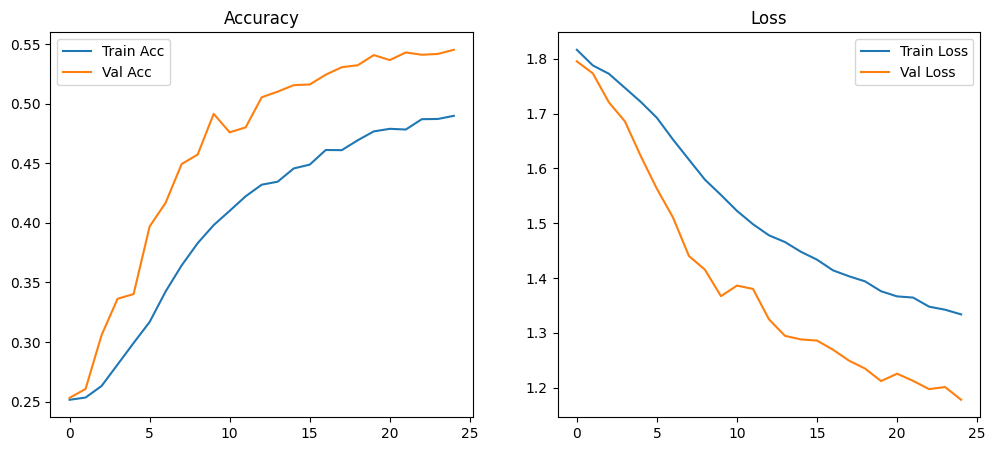

In [13]:
# -------------------------------
# Plot Training Curves
# -------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()
